In [2]:
from scipy.optimize._nonlin import Jacobian
from sympy import*
from dtumathtools import*
init_printing()

# Uge 2: Øvelser

## Opgaver -- Store Dag

### 1: Niveaukurver og retningsafledte for skalar-funktioner

En funktion $f:\mathbb{R}^2\rightarrow\mathbb{R}$ er givet ved forskriften 
\begin{equation*}
    f(x,y)=x^2+y^2.
\end{equation*}

Og en anden funktion $g:\mathbb{R}^2\rightarrow\mathbb{R}$ er givet ved forskriften 
\begin{equation*}
    g(x,y)=x^2-4x+y^2.
\end{equation*}

#### Spørgsmål a

Beskriv niveaukurverne givet ved $f(x,y)=c$ for værdierne $c\in\{1,2,3,4,5\}$.

#### Svar
For at gøre dette, vil vi isolere $y$ i $f(x,y)=c$ og derefter tegne niveaukurverne for de givne værdier af $c$.

1. For f:
$$
\begin{aligned}
    f(x,y) &= c \\
    x^2 + y^2 &= c \\
    y^2 &= c - x^2 \\
    y &= \pm\sqrt{c - x^2}
\end{aligned}
$$
2. For g:
$$
\begin{aligned}
    g(x,y) &= c \\
    x^2 - 4x + y^2 &= c \\
    y^2 &= c + 4x - x^2 \\
    y &= \pm\sqrt{c + 4x - x^2}
\end{aligned}
$$
Vi kan nu analysere de to funktioner og deres niveaukurver. Som vi kan se følger begge funktioner funktioner hvor kvadratet af $x$ og $y$ indgår. Det betyder at niveaukurverne vil være cirkler for $f$ og $g$. Vi kan nu tegne niveaukurverne for de givne værdier af $c$.

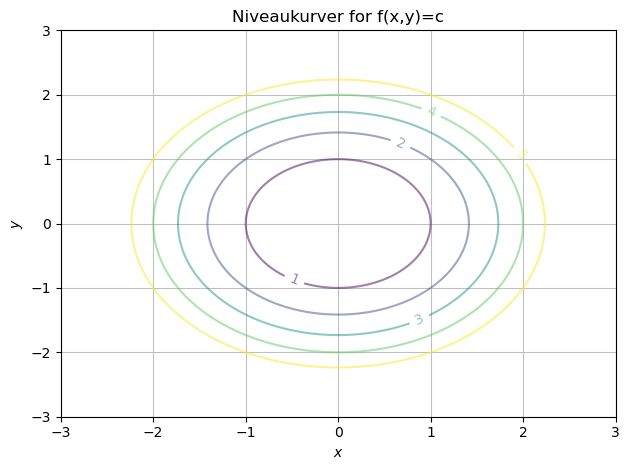

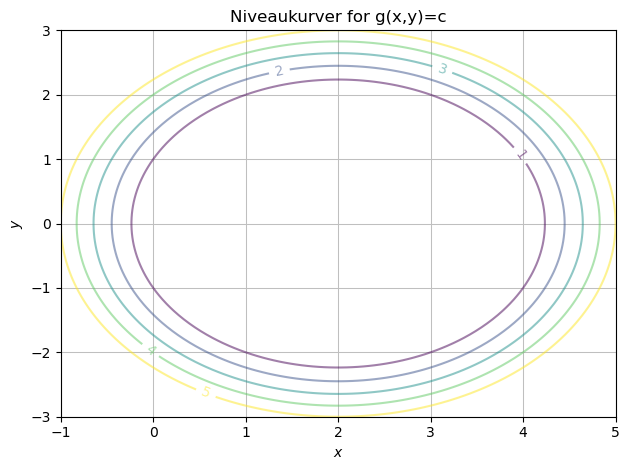

In [3]:
x, y = symbols('x y')
f = x**2 + y**2
g = x**2 - 4*x + y**2

c_values = [1, 2, 3, 4, 5]

dtuplot.plot_contour(f, (x, -3, 3), (y, -3, 3), rendering_kw={"levels":c_values, "alpha":0.5}, is_filled=False, title="Niveaukurver for f(x,y)=c")
dtuplot.plot_contour(g, (x, -1, 5), (y, -3, 3), rendering_kw={"levels":c_values, "alpha":0.5}, is_filled=False, title="Niveaukurver for g(x,y)=c")


For begge funktioner er niveaukurverne cirkler og da de begge er centreret rundt om et centralt punkt, kan vi konkludere at de er symmetrisk omkring dette punkt. For $f$ er det centrale punkt $(0,0)$ og for $g$ er det $(2,0)$. De to punkter er der hvor $f$ og $g$ har deres minimum.

#### Spørgsmål b

Bestem gradienten af $f$ i punktet $(1,1)$ og bestem den retningsafledede af $f$ i punktet $(1,1)$ i den retning der er bestemt af enhedsretningsvektoren $\pmb{e}=(1,0)$.

#### Svar
Gradienten af en funktion $f$ i et punkt $(x,y)$ er givet ved:
$$
\nabla f(x_1,x_2,\dots, x_n) = \left(\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n}\right)
$$

Vi kan nu beregne gradienten af $f$ i punktet $(1,1)$:
$$
\begin{aligned}
    \nabla f(1,1) &= \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right) \\
    &= \left(2x, 2y\right) \\
    &= (2, 2)
\end{aligned}
$$

Den retningsafledede af en funktion $f$ i et punkt $(x,y)$ i retningen af en enhedsvektor $\pmb{e}$ er givet ved:
$$
D_{\pmb{e}}f(x,y) = \nabla_{\pmb{e}} f(x,y) = \langle \pmb{e}, \nabla f(x,y) \rangle
$$
Vi kan nu beregne den retningsafledede af $f$ i punktet $(1,1)$ i retningen af $\pmb{e}=(1,0)$:
$$
\begin{aligned}
    D_{\pmb{e}}f(1,1) &= \nabla f(1,1) \cdot \pmb{e} \\
    &= (2, 2) \cdot (1, 0) \\
    &= 2
\end{aligned}
$$
Så den retningsafledede af $f$ i punktet $(1,1)$ i retningen af $\pmb{e}=(1,0)$ er $2$.


#### Spørgsmål c

Beskriv niveaukurverne givet ved $g(x,y)=c$ for værdierne $c \in\{-3,-2,-1,0,1\}$.

#### Svar
Hvis vi kigger på oversående funktion der definerer niveaukurverne for $g$, kan vi se at den er givet ved:
$$
y = \pm\sqrt{c + 4x - x^2}
$$
Vi kan se at dette ligesom for $f$ følger cirkeligningen, så niveaukurverne for $g$ også vil være cirkler. Vi kan nu tegne niveaukurverne for de givne værdier af $c$.

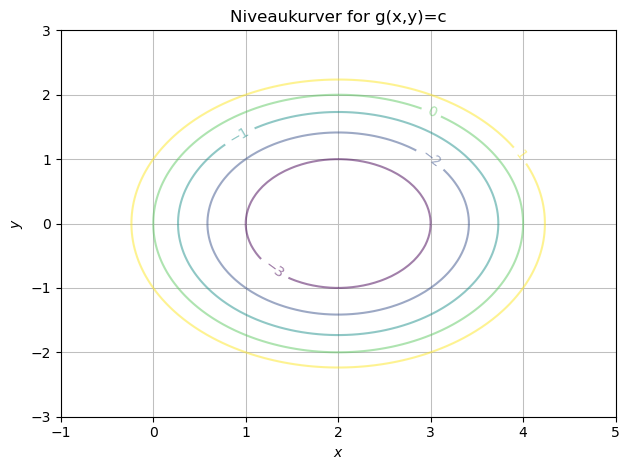

In [4]:
c_values = [-3, -2, -1, 0, 1]

dtuplot.plot_contour(g, (x, -1, 5), (y, -3, 3), rendering_kw={"levels":c_values, "alpha":0.5}, is_filled=False, title="Niveaukurver for g(x,y)=c")

#### Spørgsmål d

Bestem gradienten af $g$ i punktet $(1,2)$ og bestem den retningsafledede af $g$ i punktet $(1,2)$ i retningen mod Origo $(0,0)$.

#### Svar
For at bestemme gradienten af $g$ i punktet $(1,2)$, kan vi bruge samme metode som før. Vi kan beregne gradienten af $g$ i punktet $(1,2)$:
$$
\begin{aligned}
    \nabla g(1,2) &= \left(\frac{\partial g}{\partial x}, \frac{\partial g}{\partial y}\right) \\
    &= \left(2x - 4, 2y\right) \\
    &= (-2, 4)
\end{aligned}
$$
For at bestemme en retningsafledede i retningen mod Origo $(0,0)$, skal vi finde en enhedsvektor $\pmb{e}$ der peger mod Origo. Vi kan finde denne ved at tage forskellen mellem $(1,2)$ og $(0,0)$ og derefter normalisere den:

$$
\pmb{e} = \frac{(0,0) - (1,2)}{\sqrt{(0-1)^2 + (0-2)^2}} = \frac{(-1,-2)}{\sqrt{5}} = \left(-\frac{1}{\sqrt{5}}, -\frac{2}{\sqrt{5}}\right)
$$

Vi kan nu beregne den retningsafledede af $g$ i punktet $(1,2)$ i retningen mod Origo $(0,0)$:
$$
\begin{aligned}
    D_{\pmb{e}}g(1,2) &= \nabla g(1,2) \cdot \pmb{e} \\
    &= (-2, 4) \cdot \left(-\frac{1}{\sqrt{5}}, -\frac{2}{\sqrt{5}}\right) \\
    &= \frac{2}{\sqrt{5}} + \frac{-8}{\sqrt{5}} = -\frac{6}{\sqrt{5}}
\end{aligned}
$$

### 2: Jacobianter for forskellige funktioner

Vi definerer funktioner nedenfor af formen $\pmb{f}: \operatorname{dom}(\pmb{f}) \to \mathbb{R}^k$, hvor $\operatorname{dom}(\pmb{f}) \subseteq \mathbb{R}^n$ og hvor $n$ og $k$ kan aflæses af funktionsforskriften. Vi vil i denne opgave ikke bekymre os om at finde den præcise definitionsmængde $\operatorname{dom}(\pmb{f})$, men blot nævne at hvis fx $\ln(x_3)$ indgår i funktionsforeskriften, så må man jo kræve at $x_3 > 0$.   

#### Spørgsmål a

1. Lad ${f}(x_1, x_2, x_3) = x_1^2x_2 + 2x_3$. Beregn Jacobi-matricen $J_{f}(\pmb{x})$ og evaluer den i punktet $\pmb{x} = (1, -1, 3)$. Bekræft at Jacobi-matricen for en skalar-funktion af flere variable kun har én række.
#### Svar
Jacobimatricen for en hvilken som helst funktion $f$ er givet ved:
$$
\begin{aligned}
    J_f(x_1,x_2,\dots, x_n) &= \left(\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n}\right) \\
    &= \begin{bmatrix}
        \frac{\partial f}{\partial x_1} & \frac{\partial f}{\partial x_2} & \cdots & \frac{\partial f}{\partial x_n}
    \end{bmatrix}
\end{aligned}
$$
Vi kan nu beregne Jacobimatricen for de forskellige funktioner givet i opgaven.
$$
\begin{aligned}
    J_f(x_1,x_2,x_3) &= \left(\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \frac{\partial f}{\partial x_3}\right) \\
    &= \left(2x_1x_2, x_1^2, 2\right) \\
    &= \begin{bmatrix}
        2x_1x_2 & x_1^2 & 2
    \end{bmatrix}
\end{aligned}
$$
Vi kan nu evaluere Jacobimatricen i punktet $(1,-1,3)$:
$$
\begin{aligned}
    J_f(1,-1,3) &= \left(2(1)(-1), (1)^2, 2\right) \\
    &= (-2, 1, 2)
\end{aligned}
$$
Så Jacobimatricen for $f$ i punktet $(1,-1,3)$ er $(-2, 1, 2)$. Vi kan se at Jacobimatricen for en skalar-funktion kun har én række, da den kun har én funktion der afhænger af flere variable.

1. Lad $\pmb{f}(x) = (3x, x^2, \sin(2x))$. Beregn Jacobi-matricen $J_{\pmb{f}}(x)$ og evaluer den i punktet $x = 2$. Bekræft at Jacobi-matricen for en vektor-funktion af én variabel kun har én søjle.
#### Svar
Vi kan nu beregne Jacobimatricen for funktionen $\pmb{f}$ givet i opgaven:
$$
\begin{aligned}
    J_{\pmb{f}}(x) &= \left(\frac{\partial f_1}{\partial x}, \frac{\partial f_2}{\partial x}, \frac{\partial f_3}{\partial x}\right) \\
    &= \left(3, 2x, 2\cos(2x)\right) \\
    &= \begin{bmatrix}
        3 \\
        2x \\
        2\cos(2x)
    \end{bmatrix}
\end{aligned}
$$
Vi kan nu evaluere Jacobimatricen i punktet $x=2$:
$$
\begin{aligned}
    J_{\pmb{f}}(2) &= \left(3, 2(2), 2\cos(4)\right) \\
    &= \left(3, 4, 2\cos(4)\right)
\end{aligned}
$$

1. Lad $\pmb{f}(x_1, x_2) = (x_1^2, -3x_2, 12x_1)$. Beregn Jacobi-matricen $J_{\pmb{f}}(\pmb{x})$ og evaluer den i punktet $\pmb{x} = (2, 0)$.
#### Svar
Vi kan nu beregne Jacobimatricen for funktionen $\pmb{f}$ givet i opgaven:
$$
\begin{aligned}
    J_{\pmb{f}}(x_1,x_2) &= \left(\frac{\partial f_1}{\partial x_1}, \frac{\partial f_2}{\partial x_2}, \frac{\partial f_3}{\partial x_1}\right) \\
    &= \left(2x_1, -3, 12\right) \\
    &= \begin{bmatrix}
        2x_1 & -3 \\
        12 & 0
    \end{bmatrix}
\end{aligned}
$$
Vi kan nu evaluere Jacobimatricen i punktet $(2,0)$:
$$
\begin{aligned}
    J_{\pmb{f}}(2,0) &= \left(2(2), -3, 12\right) \\
    &= \begin{bmatrix}
        4 & -3 \\
        12 & 0
    \end{bmatrix}
\end{aligned}
$$

1. Lad $\pmb{f}(x_1, x_2, x_3) = (x_2 \sin(x_3), 3x_1x_2 \ln(x_3))$. Beregn Jacobi-matricen $J_{\pmb{f}}(\pmb{x})$ og evaluer den i punktet $\pmb{x} = (-1, 3, 2)$.
#### Svar
Vi kan nu beregne Jacobimatricen for funktionen $\pmb{f}$ givet i opgaven:
$$
\begin{aligned}
    J_{\pmb{f}}(x_1,x_2,x_3) &= \left(\frac{\partial f_1}{\partial x_1}, \frac{\partial f_2}{\partial x_2}, \frac{\partial f_3}{\partial x_3}\right) \\
    &= \left(0, 3x_2\ln(x_3), 3x_1x_2\frac{1}{x_3}\right) \\
    &= \begin{bmatrix}
        0 & 3x_2\ln(x_3) & 0 \\
        3x_1x_2\frac{1}{x_3} & 0 & 0
    \end{bmatrix}
\end{aligned}
$$
Vi kan nu evaluere Jacobimatricen i punktet $(-1,3,2)$:
$$
\begin{aligned}
    J_{\pmb{f}}(-1,3,2) &= \left(0, 3(3)\ln(2), 0\right) \\
    &= \begin{bmatrix}
        0 & 9\ln(2) & 0 \\
        -\frac{9}{2} & 0 & 0
    \end{bmatrix}
\end{aligned}
$$

1. Lad $\pmb{f}(x_1, x_2, x_3) = (x_1 e^{x_2}, 3x_2 \sin(x_2), -x_1^2 \ln(x_2 + x_3))$. Beregn Jacobi-matricen $J_{\pmb{f}}(\pmb{x})$ og evaluer den i punktet $\pmb{x} = (1, 0, 1)$.
#### Svar
Vi kan nu beregne Jacobimatricen for funktionen $\pmb{f}$ givet i opgaven:
$$
\begin{aligned}
    J_{\pmb{f}}(x_1,x_2,x_3) &= \left(\frac{\partial f_1}{\partial x_1}, \frac{\partial f_2}{\partial x_2}, \frac{\partial f_3}{\partial x_3}\right) \\
    &= \left(e^{x_2}, 3\sin(x_2), -\frac{x_1^2}{x_2 + x_3}\right) \\
    &= \begin{bmatrix}
        e^{x_2} & 0 & 0 \\
        0 & 3\sin(x_2) & 0 \\
        -\frac{x_1^2}{x_2 + x_3} & 0 & 0
    \end{bmatrix}
\end{aligned}
$$
Vi kan nu evaluere Jacobimatricen i punktet $(1,0,1)$:
$$
\begin{aligned}
    J_{\pmb{f}}(1,0,1) &= \left(e^{0}, 3\sin(0), -\frac{1^2}{0 + 1}\right) \\
    &= \begin{bmatrix}
        1 & 0 & 0 \\
        0 & 0 & 0 \\
        -1 & 0 & 0
    \end{bmatrix}
\end{aligned}
$$

#### Spørgsmål b

Alle funktionerne fra forrige spørgsmål er differentiable. Hvordan kan man argumentere for dette? For hvilke af funktionerne kan vi udregne Hesse-matricen? (eng: the hessian). Udregn Hesse-matricen for de af funktionerne hvor Hesse-matricen er defineret.

#### Svar
Man kan argumentere for at funktionerne er differentiable ved at vise at de partielle afledede eksisterer og er kontinuerte. Hesse-matricen er defineret for funktioner der har to eller flere variable og hvor de partielle afledede eksisterer. Formelt kan man definerer Hesse-matricen som:
$$
H(f) = \begin{bmatrix}
    \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
    \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
    \vdots & \vdots & \ddots & \vdots \\
    \frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
$$
Dette kan gøres i hånden ved at man bruger resultaterne fra Jacobi-matricen og derefter differentierer dem igen. Eksempelvis med funktionen fra 1:
$$
H_f =
\begin{bmatrix}
    \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \frac{\partial^2 f}{\partial x_1 \partial x_3} \\
    \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \frac{\partial^2 f}{\partial x_2 \partial x_3} \\
    \frac{\partial^2 f}{\partial x_3 \partial x_1} & \frac{\partial^2 f}{\partial x_3 \partial x_2} & \frac{\partial^2 f}{\partial x_3^2}
\end{bmatrix}
=
\begin{bmatrix}
    2x_2 & 2x_1 & 0 \\
    2x_1 & 0 & 0 \\
    0 & 0 & 0
\end{bmatrix}
$$

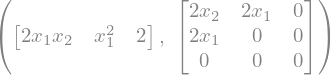

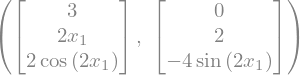

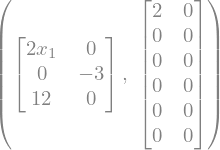

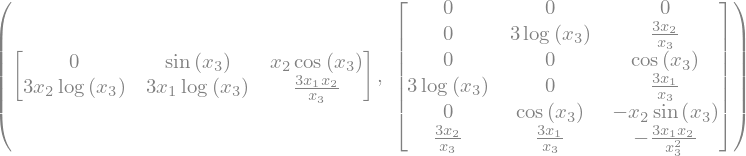

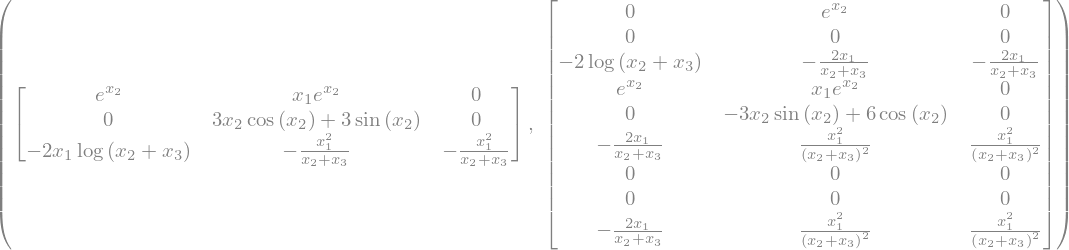

In [5]:
x_1, x_2, x_3 = symbols('x_1 x_2 x_3')
f_1 = x_1**2*x_2 + 2*x_3
J_f_1 = Matrix([f_1]).jacobian([x_1, x_2, x_3])
H_f_1 = dtutools.hessian(f_1, (x_1, x_2, x_3))
display((J_f_1, H_f_1))

f_2 = Matrix([3*x_1, x_1**2, sin(2*x_1)])
J_f_2 = f_2.jacobian([x_1])
H_f_2 = dtutools.hessian(f_2, (x_1,))
display((J_f_2, H_f_2))

f_3 = Matrix([x_1**2, -3*x_2, 12*x_1])
J_f_3 = f_3.jacobian([x_1, x_2])
H_f_3 = dtutools.hessian(f_3, (x_1, x_2))
display((J_f_3, H_f_3))

f_4 = Matrix([x_2*sin(x_3), 3*x_1*x_2*log(x_3)])
J_f_4 = f_4.jacobian([x_1, x_2, x_3])
H_f_4 = dtutools.hessian(f_4, (x_1, x_2, x_3))
display((J_f_4, H_f_4))

f_5 = Matrix([x_1*exp(x_2), 3*x_2*sin(x_2), -x_1**2*log(x_2 + x_3)])
J_f_5 = f_5.jacobian([x_1, x_2, x_3])
H_f_5 = dtutools.hessian(f_5, (x_1, x_2, x_3))
display((J_f_5, H_f_5))



#### Spørgsmål c

Lad $\pmb{v} = (1,1,1)$. Normaliser vektoren $\pmb{v}$ og kald denne $\pmb{e}$. Tjek at $||\pmb{e}||=1$. Udregn den retningsafledte af skalar-funktionen ${f}(x_1, x_2, x_3) = x_1^2x_2 + 2x_3$ i punktet $\pmb{x} = (1, -1, 3)$ i retningen $\pmb{v}$. Udregn bagefter $J_f(\pmb{x}) \pmb{e}$. Sammenlign med den retningsafledte. Er de ens? I så fald: er det et tilfælde?

#### Svar
Vi kan normalisere vektoren $\pmb{v}$ ved at dividere den med dens længde:
$$
\begin{aligned}
    \pmb{e} &= \frac{\pmb{v}}{||\pmb{v}||} \\
    &= \frac{(1,1,1)}{\sqrt{(1)^2 + (1)^2 + (1)^2}} \\
    &= \frac{(1,1,1)}{\sqrt{3}} \\
    &= \left(\frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}}\right)
\end{aligned}
$$
Vi kan nu tjekke at $||\pmb{e}||=1$:
$$
\begin{aligned}
    ||\pmb{e}|| &= \sqrt{\left(\frac{1}{\sqrt{3}}\right)^2 + \left(\frac{1}{\sqrt{3}}\right)^2 + \left(\frac{1}{\sqrt{3}}\right)^2} \\
    &= \sqrt{\frac{1}{3} + \frac{1}{3} + \frac{1}{3}} \\
    &= \sqrt{1} = 1
\end{aligned}
$$
Så $||\pmb{e}||=1$. Den retningsafledede af skalar-funktionen ${f}(x_1, x_2, x_3) = x_1^2x_2 + 2x_3$ i punktet $\pmb{x} = (1, -1, 3)$ i retningen $\pmb{v}$ er givet ved:
$$
\begin{aligned}
    D_{\pmb{v}}f(\pmb{x}) &= \nabla f(\pmb{x}) \cdot \pmb{e} \\
    &= J_f(\pmb{x}) \cdot \pmb{e} \\
    &= (-2, 1, 2) \cdot \left(\frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}}\right) \\
    &= -\frac{2}{\sqrt{3}} + \frac{1}{\sqrt{3}} + \frac{2}{\sqrt{3}} = \frac{1}{\sqrt{3}}
\end{aligned}
$$
Vi kan nu beregne $J_f(\pmb{x}) \pmb{e}$:
$$
\begin{aligned}
    J_f(\pmb{x}) \pmb{e} &= (-2, 1, 2) \cdot \left(\frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}}\right) \\
    &= -\frac{2}{\sqrt{3}} + \frac{1}{\sqrt{3}} + \frac{2}{\sqrt{3}} = \frac{1}{\sqrt{3}}
\end{aligned}
$$
Så $J_f(\pmb{x}) \pmb{e} = \frac{1}{\sqrt{3}}$. Vi kan se at den retningsafledede og $J_f(\pmb{x}) \pmb{e}$ er ens, da de begge er lig med $\frac{1}{\sqrt{3}}$. Dette er ikke et tilfælde, da det er en konsekvens af kædereglen for retningsafledede.


### 3: Beskrivelse af mængder i planen

Tegn i hvert af de fire nedenstående tilfælde en skitse af den angivne punktmængde $\,A\,$, det indre $\,A^{\circ}\,$, randen $\,\partial A\,$ og afslutningen $\,\bar{A}\,$. Undersøg endvidere, om $\,A\,$ er åben, afsluttet eller ingen af delene. Angiv endelig, om $\,A\,$ er begrænset eller ikke.

1. $\{(x,y) \mid xy\neq 0\}$
1. $\{(x,y) \mid 0<x<1 \wedge 1\leq y\leq 3\}$  
1. $\{(x,y) \mid y\geq x^2 \wedge y<2 \}$  
1. $\{(x,y) \mid x^2+y^2-2x+6y\leq 15 \}$

#### Svar
En punktmængde er en delmængde af $\mathbb{R}^2$ og beskriver en samling af punkter i planen. En punktmængde kan være åben, afsluttet eller ingen af delene. En punktmængde er åben hvis den indeholder alle sine indre punkter, og den er afsluttet hvis den indeholder alle sine randpunkter. En punktmængde er begrænset hvis den kan indskydes i en cirkel med endelig radius.
Randpunkter er punkter der ligger på grænsen af en punktmængde, og indre punkter er punkter der ligger inde i en punktmængde.
1. $A = \{(x,y) \mid xy\neq 0\}$ udgør det reelle talplan, men uden koordinatakserne. Dette område udgør også det indre af mængden, mens randen af mængden udgøres af koordinatakserne. Afslutningen af mængden er hele planen, da den indeholder alle sine randpunkter. Mængden er åben og ikke begrænset, da den ikke indeholder sine randpunkter og kan ikke indskydes i en cirkel med endelig radius.
2. $A = \{(x,y) \mid 0<x<1 \wedge 1\leq y\leq 3\}$ er en rektangel, der indslutter linjerne $x = 0$, $x = 1$, $y = 1$ og $y = 3$. Her tilhører $x=0$ og $x = 1$ ikke mængden, da de ikke er indeholdt i intervallet $0<x<1$. Men da $y=1$ og $y=3$ er indeholdt i intervallet $1\leq y\leq 3$, tilhører de mængden. Mængden er derfor ikke åben, da den ikke indeholder alle sine randpunk og den er ikke afsluttet. Mængden er begrænset, da den kan indskydes i en cirkel med endelig radius.
3. $A = \{(x,y) \mid y\geq x^2 \wedge y<2 \}$ er fællesmængden af det område som ligger over parablen med ligningen $y=x^2$ og under linjen $y=2$. Mængden er ikke åben, da den ikke indeholder alle sine randpunkter. Mængden er afsluttet, da den indeholder alle sine randpunkter og den er begrænset, da den kan indskydes i en cirkel med endelig radius.
4. $A = \{(x,y) \mid x^2+y^2-2x+6y\leq 15 \}$ er en cirkel med centrum i $(1,-3)$ og radius $5$. Mængden er åben, da den indeholder alle sine randpunkter. Mængden er afsluttet, da den indeholder alle sine randpunkter og den er begrænset, da den kan indskydes i en cirkel med endelig radius.

### 4: Alle lineære afbildninger fra $\mathbb{R^n}$ til $\mathbb{R}$

Lad $L: \mathbb{R}^n \to \mathbb{R}$ være en (vilkårlig) lineær afbildning. Lad $e = \pmb{e}_1, \pmb{e}_2, \dots, \pmb{e}_n$ være standard-basen for $\mathbb{R}^n$, og lad $\beta$ være standard-basen for $\mathbb{R}$. Husk standard basen fra [Matematik 1a](https://mat1a.compute.dtu.dk/_assets/enotesvol1.pdf#prop:standardbasisFn).
Bemærk da dimensionen af $\mathbb{R}$ (over $\mathbb{R}$) er en, er standard-basen for $\mathbb{R}$ blot tallet $1$. 

Vis at der eksisterer en søjlevektor $\pmb{c} \in \mathbb{R}^n$ således at 
\begin{equation*}
   L(\pmb{x}) = \pmb{c}^T \pmb{x} = \langle \pmb{x}, \pmb{c} \rangle  
\end{equation*}
hvor $\langle \cdot, \cdot \rangle$ angiver det sædvanlige indreprodukt på $\mathbb{R}^n$. (Søjlevektoren er entydigt givet, men det er ikke en del af opgaven at argumentere for dette).

#### Svar
For at gøre dette kan vi starte med at analyserer afbildningen af $L$ m.h.t de to baser $e$ og $\beta$. Vi kan skrive $L$ som en matrix $A$ der er givet ved:
$$
\begin{aligned}
    L(\pmb{x}) &= A \pmb{x} \\
    &= \begin{bmatrix}
        a_1 & a_2 & \cdots & a_n
    \end{bmatrix} \begin{bmatrix}
        x_1 \\
        x_2 \\
        \vdots \\
        x_n
    \end{bmatrix} \\
    &= a_1x_1 + a_2x_2 + \cdots + a_nx_n
\end{aligned}
$$
Vi kan nu se at $L$ er givet ved en søjlevektor $\pmb{c} = \begin{bmatrix}
    a_1 \\
    a_2 \\
    \vdots \\
    a_n
\end{bmatrix}$, således at $L(\pmb{x}) = \pmb{c}^T \pmb{x}$. Vi kan nu se at $L$ er givet ved et indreprodukt $\langle \pmb{x}, \pmb{c} \rangle$, da det er givet ved:
$$
\begin{aligned}
    L(\pmb{x}) &= \pmb{c}^T \pmb{x} \\
    &= \langle \pmb{x}, \pmb{c} \rangle
\end{aligned}
$$
Så vi kan konkludere at der eksisterer en søjlevektor $\pmb{c} \in \mathbb{R}^n$ således at $L(\pmb{x}) = \pmb{c}^T \pmb{x} = \langle \pmb{x}, \pmb{c} \rangle$. Man kan også sige at hvis vi vælger standardbasen $e = (e_1,\dots,e_n)$ i $\mathbb{R}^n$ og standardbasen for R (som er $1$), så vil afbildningsmatricen for $L$ mht. disse baser være:
$$
_\beta[L]_{e} = [L(e_1), L(e_2), \dots, L(e_n)]
$$
Dette er nøjagtigt transponeret udgave af søjlevektoren cc, som derfor må være:
$$
c = [L(e_1), L(e_2), \dots, L(e_n)]^T
$$
Dermed kan man genskabe hele $L$ ved blot at kende dens værdi på basisvektorerne.

### 5: Linæere(?) vektor funktioner

Vi betragter følgende to funktioner: 

1. $f: \mathbb{R}^{2 \times 2} \to \mathbb{R}^{2 \times 2}, f(X) = C X B$, hvor $C = \operatorname{diag}(2,1) \in \mathbb{R}^{2 \times 2}$ og $B = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}$.
1. $g: \mathbb{R}^n \to \mathbb{R}, g(\pmb{x}) = \pmb{x}^T A \pmb{x}$, hvor $A$ er en $n \times n$ matrix (og ikke nulmatricen).

Afgør for hver funktion om den er en lineær afbildning. Hvis afbildningen er lineær, find [afbildningsmatricen](https://mat1a.compute.dtu.dk/_assets/enotesvol1.pdf#lem:matrix_repr) med hensyn til, henholdsvis:

1. standard-basen $E=\begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}, \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix}, \begin{bmatrix} 0 & 0 \\ 1 & 0 \end{bmatrix}, \begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix}$ i $\mathbb{R}^{2 \times 2}$. Husk [dette eksempel fra Mat1a](https://mat1a.compute.dtu.dk/_assets/enotesvol1.pdf#ex:matricesEij)
1. standard-basen $e$ i $\mathbb{R}^n$. Husk [dette result fra Mat1a](https://mat1a.compute.dtu.dk/_assets/enotesvol1.pdf#prop:standardbasisFn)

#### Svar
![image.png](../images/Afbildningsmatrix.png)
1. $f: \mathbb{R}^{2 \times 2} \to \mathbb{R}^{2 \times 2}, f(X) = C X B$
For at bestemme om $f$ er en lineær afbildning, skal vi vise at den opfylder de to betingelser for lineære afbildninger:
- $f(X_1 + X_2) = f(X_1) + f(X_2)$
- $f(cX) = c f(X)$ for alle $X_1, X_2 \in \mathbb{R}^{2 \times 2}$ og $c \in \mathbb{R}$.
Vi kan starte med at vise den første betingelse:
$$
\begin{aligned}
    f(X_1 + X_2) &= C(X_1 + X_2)B \\
    &= CX_1B + CX_2B \\
    &= f(X_1) + f(X_2)
\end{aligned}
$$
Vi kan nu vise den anden betingelse:
$$
\begin{aligned}
    f(cX) &= C(cX)B \\
    &= c(CXB) \\
    &= cf(X)
\end{aligned}
$$
Da begge betingelser er opfyldt, kan vi konkludere at $f$ er en lineær afbildning. Vi kan nu finde afbildningsmatricen for $f$ med hensyn til standard-basen $E=\begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}, \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix}, \begin{bmatrix} 0 & 0 \\ 1 & 0 \end{bmatrix}, \begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix}$ i $\mathbb{R}^{2 \times 2}$:
$$
\begin{aligned}
    f(E_1) &= CEB \\
    &= \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \\
    &= \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \\
    &= \begin{bmatrix} 2 & 2 \\ 0 & 0 \end{bmatrix}
\end{aligned}
$$
$$
\begin{aligned}
    f(E_2) &= CEB \\
    &= \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \\
    &= \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix} \\
    &= \begin{bmatrix} 0 & 2 \\ 0 & 0 \end{bmatrix}
\end{aligned}
$$
$$
\begin{aligned}
    f(E_3) &= CEB \\
    &= \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 0 & 0 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \\
    &= \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 0 & 0 \\ 1 & 1 \end{bmatrix} \\
    &= \begin{bmatrix} 0 & 0 \\ 1 & 1 \end{bmatrix}
\end{aligned}
$$
$$
\begin{aligned}
    f(E_4) &= CEB \\
    &= \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \\
    &= \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix} \\
    &= \begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix}
\end{aligned}
$$

2. $g: \mathbb{R}^n \to \mathbb{R}, g(\pmb{x}) = \pmb{x}^T A \pmb{x}$, hvor $A$ er en $n \times n$ matrix (og ikke nulmatricen).
For at bestemme om $g$ er en lineær afbildning, skal vi vise at den opfylder de to betingelser for lineære afbildninger:
Vi kan starte med at vise den første betingelse:
$$
\begin{aligned}
    g(\pmb{x_1} + \pmb{x_2}) &= (\pmb{x_1} + \pmb{x_2})^T A (\pmb{x_1} + \pmb{x_2}) \\
    &= \pmb{x_1}^T A \pmb{x_1} + \pmb{x_2}^T A \pmb{x_2} + 2\pmb{x_1}^T A \pmb{x_2} \\
    &\neq g(\pmb{x_1}) + g(\pmb{x_2})
\end{aligned}
$$
Vi kan nu se at den første betingelse ikke er opfyldt, da $g(\pmb{x_1} + \pmb{x_2}) \neq g(\pmb{x_1}) + g(\pmb{x_2})$. Vi kan derfor konkludere at $g$ ikke er en lineær afbildning.




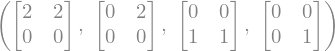

In [6]:
E_1 = Matrix([[1, 0], [0, 0]])
E_2 = Matrix([[0, 1], [0, 0]])
E_3 = Matrix([[0, 0], [1, 0]])
E_4 = Matrix([[0, 0], [0, 1]])
C = Matrix([[2, 0], [0, 1]])
B = Matrix([[1, 1], [0, 1]])
f_E_1 = C * E_1 * B
f_E_2 = C * E_2 * B
f_E_3 = C * E_3 * B
f_E_4 = C * E_4 * B
display((f_E_1, f_E_2, f_E_3, f_E_4))

### 6: Den simple kæderegel

I denne opgave skal vi arbejde med den simple kæderegel givet <a href="../_assets/textbook_mat1b_en.pdf#cor:chain-rule-simple-Rn-R">her</a>.

Vi betragter først en reel funktion af to reelle variable givet ved forskriften
\begin{equation*}
    g(x,y)=\ln(9-x^2-y^2).
\end{equation*}

#### Spørgsmål a

Bestem den størst mulige definitionsmængde for $g$, og karakterisér den ved hjælp af begreber som åben, afsluttet, begrænset, ubegrænset.

#### Svar
Den største mulige definitionsmængde for $g$ er den mængde af punkter $(x,y)$ i planen, hvor $9-x^2-y^2>0$. Vi kan nu bestemme denne mængde ved at løse uligheden:
$$
\begin{aligned}
    9-x^2-y^2 &> 0 \\
    x^2+y^2 &< 9
\end{aligned}
$$
Som vi kan se er det indre i logaritmen en cirkel med centrum i $(0,0)$ og radius $3$. Den største mulige definitionsmængde for $g$ er derfor den åbne cirkel med centrum i $(0,0)$ og radius $<3$.

Vi har nu at den størst mulige definitionsmængde følger:
$$
D = \{(x,y) \in \mathbb{R}^2 \mid x^2+y^2<9\}
$$

Denne mængde er:
- Åben, da den ikke indeholder sine randpunkter $x^2+y^2=9$.
- Begrænset, da den kan indskydes i en cirkel med radius $3$.
- Ikke afsluttet, da den ikke indeholder sine randpunkter.


Vi betragter nu en parametriseret kurve $\pmb{r}$ i $(x,y)$-planen givet ved
\begin{equation*}
    \pmb{r}(u)=(u,u^3)\,,\,u\in \left[-1.2\,,\,1.2\right].
\end{equation*}

#### Spørgsmål b

Hvilken kurve er der tale om (du er bekendt med dens *ligning*)?

#### Svar
Man kan finde kurven ved at eliminere parameteren $u$ fra ligningen:
$$
\begin{aligned}
    y &= u^3 \\
    x &= u
\end{aligned}
$$
Vi kan nu finde $u$ i den første ligning og indsætte det i den anden ligning:
$$
\begin{aligned}
    x &= u \\
    y &= x^3
\end{aligned}
$$
Så kurven er givet ved ligningen $y=x^3$. Da $u$ varierer fra $-1.2$ til $1.2$, vil kurven være begrænset til det område der er givet ved $-1.2\leq u\leq 1.2$.

**Karakteristik af kurven:**
- Kurven går gennem origo (0,0)(0,0).
- Den har ingen maksimum eller minimum, da $y=x^3$ er en strengt voksende funktion.
- Den er ikke symmetrisk om y-aksen, men derimod symmetrisk om origo (det vil sige: punktsymmetrisk).
 - Funktionen har ingen asymptoter.

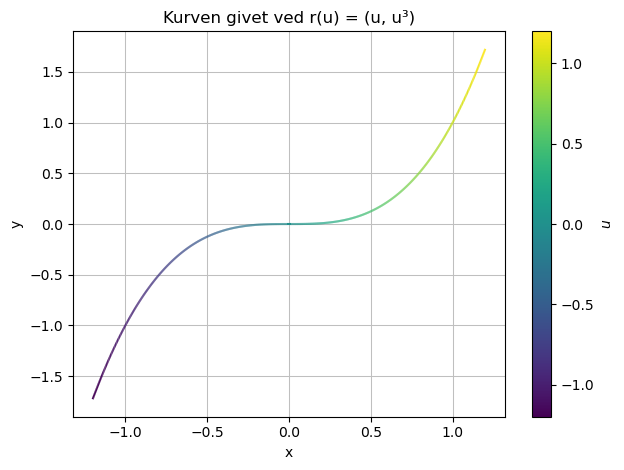

In [10]:
u = symbols('u')
x = u
y = u**3

# Visuelt repræsenterer kurven
dtuplot.plot_parametric(x, y, (u, -1.2, 1.2), title='Kurven givet ved r(u) = (u, u³)', xlabel='x', ylabel='y')

Vi betragter nu den sammensatte funktion
\begin{equation*}
    h(u) = g(\pmb{r}(u)).
\end{equation*}

#### Spørgsmål c

Hvad er definitionsmændgen og dispositionsmængden for $h = g \circ \pmb{r}$?

#### Svar
For den sammensatte funktion $h = g \circ \pmb{r}$ gælder at dens definitionsmængde er defineret af det mulige outut fra funktionen $g$ og den mulige input fra funktionen $\pmb{r}$. Vi ved også at $g$ er defineret for $x^2+y^2<9$, så vi kan finde den største og laveste input tilladt af $g$ ved at sætte $x^2+y^2=9$ i ligningen for $r$:
$$
\begin{aligned}
    9 - x^2+y^2 &> 0 \\
    u^2+u^6 &< 9
\end{aligned}
$$
Vi skal nu finde det interval af $u$ der opfylder denne ulighed. Vi kan nu tjekke om $u=1.2$ opfylder uligheden:
$$
\begin{aligned}
    u^2+u^6 &< 9 \\
    (1.2)^2+(1.2)^6 &< 9 \\
    1.44+2.985984 &< 9 \\
    4.425984 &< 9
\end{aligned}
$$
Da $u=-1.2$ giver samme resultat, kan vi konkluderer at definitionsmængden for $h$ er:
$$
D_h = \{u \in \mathbb{R} \mid u^2+u^6<9\} = [-1.2, 1.2]
$$
Vi kan nu udregne dispositionsmængden for $h$ ved at finde det størst mulige output fra funktionen $h$, hvilket må være $ln(9)$. Mindsteværdien må være $ln(9-4.425984) = ln(4.574016)$. Så dispositionsmængden for $h$ er:
$$
R_h = \{h(u) \in \mathbb{R} \mid h(u) = ln(9-u^2-u^6)\} = [ln(4.574016), ln(9)]
$$

**NOTE**

I nogle formelle sammenhænge defineres co-domænet (co-dom) for $h$ som $\mathbb{R}$, fordi logaritmen generelt sender til $\mathbb{R}$. Det er dog vigtigt at skelne mellem co-domæne (det man tillader som målrum) og dispositionsmængde (det funktionen faktisk rammer).


#### Spørgsmål d

Bestem $h'(1)$ ved to forskellige metoder:
1. Bestem et funktionsudtryk for $h(u)$ og differentiér på sædvanlig vis.
1. Benyt <a href="../_assets/textbook_mat1b_en.pdf#cor:chain-rule-simple-Rn-R">Kædereglen</a>  i Afsnit 3.7.

#### Svar
1. Vi kan finde $h'(1)$ ved at differentiere funktionen $h(u)$ direkte:
$$
\begin{aligned}
    h(u) &= g(\pmb{r}(u)) \\
    &= \ln(9-u^2-u^6) \\
    h'(u) &= \frac{d}{du}(\ln(9-u^2-u^6)) \\
    &= \frac{1}{9-u^2-u^6} \cdot (-2u-6u^5) \\
    &= -\frac{2u+6u^5}{9-u^2-u^6}
\end{aligned}
$$
Vi kan nu finde $h'(1)$ ved at indsætte $u=1$ i ligningen:
$$
\begin{aligned}
    h'(1) &= -\frac{2(1)+6(1)^5}{9-(1)^2-(1)^6} \\
    &= -\frac{2+6}{9-1-1} \\
    &= -\frac{8}{7}
\end{aligned}
$$
2. Vi kan finde $h'(1)$ ved at bruge kædereglen:
Kædereglen siger at hvis $h(u) = g(\pmb{r}(u))$, så gælder:
$$
\begin{aligned}
    h'(u) &= \nabla g(\pmb{r}(u)) \cdot \pmb{r}'(u) \\
    &= \nabla g(\pmb{r}(1)) \cdot \pmb{r}'(1)
\end{aligned}
$$
Vi kan nu starte med at differentierer $g$ med hensyn til $x$ og $y$:
$$
\begin{aligned}
    \nabla g(x,y) &= \left(\frac{\partial g}{\partial x}, \frac{\partial g}{\partial y}\right) \\
    &= \left(-\frac{2x}{9-x^2-y^2}, -\frac{2y}{9-x^2-y^2}\right)
\end{aligned}
$$
Vi kan nu differentiere $r$ med hensyn til $u$:
$$
\begin{aligned}
    \pmb{r}'(u) &= \left(\frac{dx}{du}, \frac{dy}{du}\right) \\
    &= (1, 3u^2)
\end{aligned}
$$
Vi kan nu finde $h'(1)$ ved at indsætte $u=1$ i ligningen:
$$
\begin{aligned}
    h'(1) &= \nabla g(\pmb{r}(1)) \cdot \pmb{r}'(1) \\
    &= \left(-\frac{2(1)}{9-(1)^2-(1)^6}, -\frac{2(1^3)}{9-(1)^2-(1)^6}\right) \cdot (1, 3(1)^2) \\
    &= \left(-\frac{2}{7}, -\frac{2}{7}\right) \cdot (1, 3) \\
    &= -\frac{2}{7} -\frac{6}{7} \\
    &= -\frac{8}{7}
\end{aligned}
$$
Så vi kan konkludere at $h'(1) = -\frac{8}{7}$ ved begge metoder.

In [14]:
# Kan nemt løses vi python
u = symbols('u')
x = u
y = u**3
g = log(9-x**2-y**2)
g_diff = g.diff(u)
g_diff_at_1 = g_diff.subs(u, 1)
g_diff_at_1

### 7: Partielle afledede men ikke differentiabel

Vi starter med en simpel funktion $f$, der er differentiabel overalt. Lad $f:\mathbb{R}^2 \to \mathbb{R}$ være givet ved 
\begin{equation*}
    f(x_1,x_2)=x_1^2-4x_1+x_2^2.
\end{equation*}

#### Spørgsmål a

Lad $\pmb{x}_0 = (x_1,x_2) \in \mathbb{R}^2$ være et vilkårligt punkt. Gør rede for at $f$ er differentiabel i $\pmb{x}_0$ og bestem gradienten af $f$ i $\pmb{x}_0$.

> *Soft version*: Benyt resultatet i <a href="../_assets/textbook_mat1b_en.pdf#thm:partial_deriv-implies-diff">denne sætning</a> 
![image.png](../images/Theorem363.png)
> *Hard version*: Løs opgaven direkte fra <a href="../_assets/textbook_mat1b_en.pdf#def:diff-scalar-fun-several-var">definitionen</a> på differentiabilitet i afsnit 3.6. Vi følger denne fremgangsmåde i hints og svar nedenfor:

#### Svar
Theorem 3.6.3 siger, at hvis alle partielle afledede eksisterer og er kontinuerte i et åbent område $U \subseteq \mathbb{R}$, så er funktionen differentiabel i alle punkter i $U$.

Vi kan finde de partielle afledede ved at differentiere funktionen $f$ med hensyn til $x_1$ og $x_2$:
$$
\begin{aligned}
    \frac{\partial f}{\partial x_1} &= 2x_1-4 \\
    \frac{\partial f}{\partial x_2} &= 2x_2
\end{aligned}
$$
Vi kan nu finde gradienten af $f$ i $\pmb{x}_0$ ved at indsætte $x_1$ og $x_2$ i ligningen:
$$
\begin{aligned}
    \nabla f(\pmb{x}_0) &= \left(2x_1-4, 2x_2\right) \\
\end{aligned}
$$
Så vi kan konkludere at $f$ er differentiabel i $\pmb{x}_0$ og gradienten af $f$ i $\pmb{x}_0$ er $\nabla f(\pmb{x}_0) = (2x_1-4, 2x_2)$.


#### Spørgsmål b

For at konkludere differentiabilitet fra de partielle afledede, jvf. <a href="../_assets/textbook_mat1b_en.pdf#thm:partial_deriv-implies-diff">denne sætning</a>, kræves at de partielle afledede er kontinuerte. Hvorfor er det ikke nok at de partielle afledede eksisterer? Det skal vi undersøge gennem et konkret eksempel. Men først generaliserer vi en (fra gymnasiet) velkendt sætning om en funktion af én variabel: Hvis den er differentiabel i et punkt, så er den også kontinuert i det punkt.

Vis at hvis en funktion af to variable er differentiabel i et punkt $\pmb{x}_0$, så er den også kontinuert i det punkt.

Og nu til eksemplet, der har navngivet opgaven. Vi betragter funktionen

\begin{equation*}
g(x_1,x_2) =  
\begin{cases}
    \frac{x_1^2x_2}{x_1^4+x_2^2}, & \text{for } (x_1,x_2) \neq (0,0) \\
    0, & \text{for } (x_1,x_2)=(0,0)
\end{cases}
\end{equation*}

#### Spørgsmål c

Vis at de partielle afledede af $g$ eksisterer i $(0,0)$, men at $g$ ikke er differentiabel i dette punkt.

#### Svar


### 8: Den generaliserede kæderegel

I denne opgave skal vi bruge denne sætning: <a href="../_assets/textbook_mat1b_en.pdf#thm:diff_gen_chain_rule">Generalized chain rule</a> 

Givet funktionerne:
1. $\pmb{f} : \mathbb{R}^3 \to \mathbb{R}^2$ defineret ved $\pmb{f}(x_1, x_2, x_3) = (f_1(x_1, x_2, x_3), f_2(x_1, x_2, x_3))$, hvor:
    \begin{align*}
        f_1(x_1, x_2, x_3) &= x_1^2 + x_2^2 + x_3^2, \\
        f_2(x_1, x_2, x_3) &= e^{x_1 + x_2} \, \cos(x_3).
    \end{align*}
1. $g : \mathbb{R}^2 \to \mathbb{R}$ defineret ved $g(y_1, y_2) = y_1 \, \sin(y_2)$.
1. Sammensætning af disse funktioner: $h = g \circ \pmb{f}$.  

Vi vil i opgaven beregne Jacobi-matricen af $h$ (med hensyn til de variable $x_1, x_2,$ og $x_3$) ved brug af den generaliserede kæderegel. Du må gerne lave udregningerne i SymPy.

#### Spørgsmål a

Find funktionsudtrykket for $h$ samt definitionsmængden og dispositionsmængden. Udregn gradienten af $h$.

#### Svar

In [16]:
x1, x2, x3 = symbols('x1 x2 x3')
f1 = x1**2 + x2**2 + x3**2
f2 = exp(x1 + x2) * cos(x3)
f = Matrix([f1, f2])

y1, y2 = symbols('y1 y2')
g = y1 * sin(y2)
h = g.subs({y1: f[0], y2: f[1]})
simplify(h)

Funktionsudtrykket for $h$ er:
$$
h(x_1, x_2, x_3) = (x_1^2 + x_2^2 + x_3^2) \sin(e^{x_1 + x_2} \cos(x_3))
$$
Vi kan nu kigge på de inkelte led for at finde definationsmængden og dispositionsmængden for $h$:

**Definitionsmængden:**
- $x_1, x_2, x_3$ er defineret for alle $(x_1,x_2,x_3) \in \mathbb{R}^3$.
- $e^{x_1 + x_2}$ er defineret for alle $(x_1,x_2) \in \mathbb{R}^2$.
- $\cos(x_3)$ er defineret for alle $x_3 \in \mathbb{R}$.
- $\sin(x_3)$ er defineret for alle $x_3 \in \mathbb{R}$.

Så definitionsmængden for $h$ er:
$$
D_h = \{(x_1,x_2,x_3) \in \mathbb{R}^3 \mid x_1,x_2,x_3 \in \mathbb{R}\} = \mathbb{R}^3
$$

**Dispositionsmængde**
- Ikke negativt led $(x_1^2 + x_2^2 + x_3^2) \in [0,\infty[$.
- sinius funktion er defineret for alle $x_3 \in \mathbb{R}$ og har værdier i $[-1,1]$.
Så dispositionsmængden for $h$ er:
$$
R_h = \{h(x_1,x_2,x_3) \in \mathbb{R} \mid h(x_1,x_2,x_3) = (x_1^2 + x_2^2 + x_3^2) \sin(e^{x_1 + x_2} \cos(x_3))\} = [0,\infty[
$$


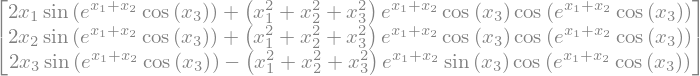

In [23]:
grad_h = Matrix([h]).jacobian([x1, x2, x3]).T
simplify(grad_h)

#### Spørgsmål b

Beregn Jacobi-matricen for $\pmb{f}$. Beregn Jacobi-matricen for $g$. Hvad er sammenhængen mellem gradienten og Jacobi-matricen for $g$?

#### Svar

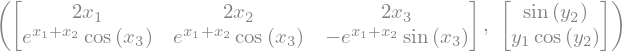

In [27]:
J_f = f.jacobian([x1, x2, x3])
J_g = Matrix([g]).jacobian([y1, y2]).T
J_f, J_g

#### Svar
Sammenhængen mellem gradienten og Jacobi-matricen for $g$ er at de er ens, da $g$ kun har én outputvariabel. Så Jacobi-matricen for $g$ er en søjlevektor, der svarer til gradienten af $g$.

#### Spørgsmål c

Anvend nu kædereglen og Jacobi-matricerne fra forrige opgave til at finde Jacobi-matricen af $h$. Sammenlign med svaret i [Spørgsmål a](exercise:den-generaliserede-kæderegel:spm-a).

#### Svar
Vi kan finde Jacobi-matricen for $h$ ved at bruge kædereglen:
$$
\begin{aligned}
    J_h &= J_g \cdot J_f \\
    &= \begin{bmatrix} \frac{\partial g}{\partial y_1} & \frac{\partial g}{\partial y_2} \end{bmatrix} \cdot \begin{bmatrix} \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \frac{\partial f_1}{\partial x_3} \\ \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \frac{\partial f_2}{\partial x_3} \end{bmatrix}
\end{aligned}
$$
Vi kan nu finde Jacobi-matricen for $h$ ved at indsætte Jacobi-matricerne for $g$ og $f$ i ligningen:
$$
\begin{aligned}
    J_h &= \begin{bmatrix} y_2 \cos(y_1) & y_1 \cos(y_2) \end{bmatrix} \cdot \begin{bmatrix} 2x_1 & 2x_2 & 2x_3 \\ e^{x_1 + x_2}\cos(x_3) & e^{x_1 + x_2}\sin(x_3) & -e^{x_1 + x_2}\sin(x_3) \end{bmatrix}
\end{aligned}
$$
Dette er lig med:
$$
\begin{aligned}
    J_h &= \begin{bmatrix} y_2 \cos(y_1) \cdot 2x_1 + y_1 \cos(y_2) \cdot e^{x_1 + x_2}\cos(x_3) \\ y_2 \cos(y_1) \cdot 2x_2 + y_1 \cos(y_2) \cdot e^{x_1 + x_2}\sin(x_3) \\ y_2 \cos(y_1) \cdot 2x_3 - y_1 \cos(y_2) \cdot e^{x_1 + x_2}\sin(x_3) \end{bmatrix}
\end{aligned}
$$
Det stemmer præcis overens, bortset fra at vi her får gradienten som rækkematrix (Jacobi-matrix) og før som søjlematrix.

### 9: Gradientvektorfelter og hesse-matricen

#### Spørgsmål a

Gradient-vektoren for $f(x_1, x_2) = x_1^2 \sin(x_2)$ er $\nabla f(\pmb{x})=(2x_1 \sin(x_2),x_1^2 \cos(x_2))$. Gradientvektoren kan derfor opfattes som en afbildning $\nabla f : \operatorname{dom}(f) \to \mathbb{R}^2$. Nedskriv afbildningen som funktion (hvor du angiver $\operatorname{dom}(f)$) og plot den som et vektorfelt.

#### Svar
Gradienten er en vektorværdig funktion:
$$
\begin{aligned}
    \nabla f : \mathbb{R}^2 &\to \mathbb{R}^2 \\
    (x_1,x_2) &\mapsto (2x_1 \sin(x_2), x_1^2 \cos(x_2))
\end{aligned}
$$
Definationsmængden for $f$ er $\mathbb{R}^2$, da $f$ er defineret for alle $(x_1,x_2) \in \mathbb{R}^2$. Vi kan nu plotte gradienten som et vektorfelt:

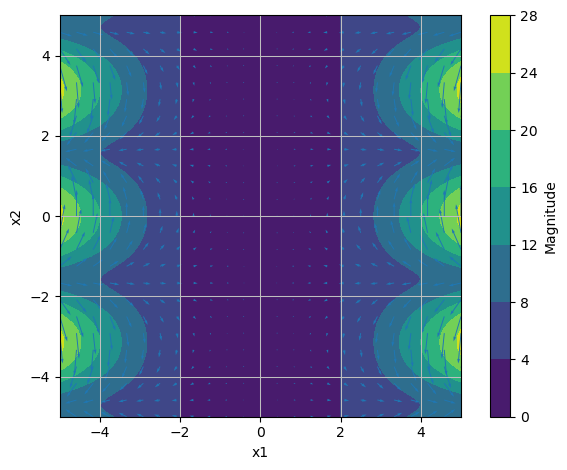

In [29]:
x1, x2 = symbols('x1 x2')
f = x1**2 * sin(x2)
grad_f = Matrix([f]).jacobian([x1, x2]).T
dtuplot.plot_vector(grad_f, (x1, -5, 5), (x2, -5, 5), xlabel='x1', ylabel='x2')

#### Spørgsmål b

Udregn nu Jacobi-matricen $\pmb{J}_{\nabla f}(x_1,x_2)$ af $\nabla f : \mathbb{R}^2 \to \mathbb{R}^2$ i punktet $(x_1,x_2)$.

#### Svar
$$
\begin{aligned}
    \pmb{J}_{\nabla f}(x_1,x_2) &= \begin{bmatrix} \frac{\partial}{\partial x_1} \nabla f_1 & \frac{\partial}{\partial x_2} \nabla f_1 \\ \frac{\partial}{\partial x_1} \nabla f_2 & \frac{\partial}{\partial x_2} \nabla f_2 \end{bmatrix} \\
    &= \begin{bmatrix} 2\sin(x_2) & 2x_1\cos(x_2) \\ 2x_1\cos(x_2) & -x_1^2\sin(x_2) \end{bmatrix}
\end{aligned}
$$



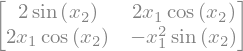

In [31]:
J_grad_f = grad_f.jacobian([x1, x2])
J_grad_f

#### Spørgsmål c

Udregn hesse-matricen $\pmb{H}_{f}(x_1,x_2)$ for $f : \mathbb{R}^2 \to \mathbb{R}$ i punktet $(x_1,x_2)$ og sammenlign med svaret i forrige opgave.

#### Svar
$$
\begin{aligned}
    \pmb{H}_{f}(x_1,x_2) &= \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} \\ \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} \end{bmatrix} \\
    &= \begin{bmatrix} 2\sin(x_2) & 2x_1\cos(x_2) \\ 2x_1\cos(x_2) & -x_1^2\sin(x_2) \end{bmatrix}
\end{aligned}
$$

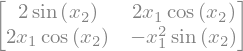

In [32]:
dtutools.hessian(f, [x1, x2])

#### Svar
Som vi kan se er hesse-matricen og Jacobi-matricen ens, da de begge indeholder de samme led. Dette skyldes at gradienten er en vektorværdig funktion, der sender fra $\mathbb{R}^2$ til $\mathbb{R}^2$. Hesse-matricen er derfor også en matrixværdig funktion, der sender fra $\mathbb{R}^2$ til $\mathbb{R}^2$.

___

## Temaøvelse -- Lille Dag

Der er tema-øvelse [](tema:1)

In [37]:
x1, x2 = symbols('x1 x2')
x = Matrix([x1, x2])
A = Matrix([[1, -8], [2, 15]])
expand(x.T*A*x)